In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv('nasdaq100.csv',sep=';')

In [6]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [8]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [9]:
df=df.drop(columns=['Date'])

In [10]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ share exchange prices')

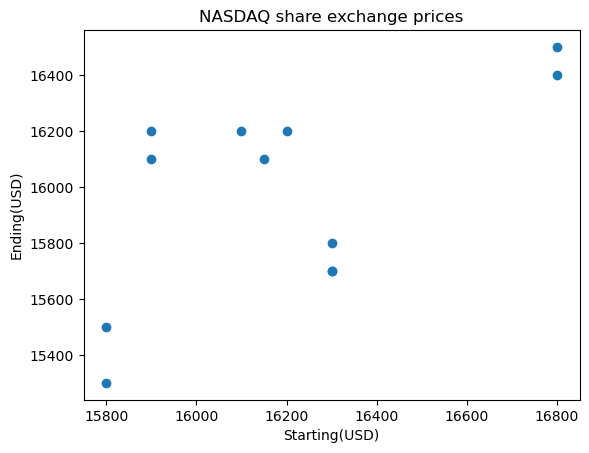

In [13]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ share exchange prices')

In [17]:
x=df[['Starting (USD)']]

In [18]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [19]:
y=df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg=LinearRegression()

In [22]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [23]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NASDAQ share exchange prices')

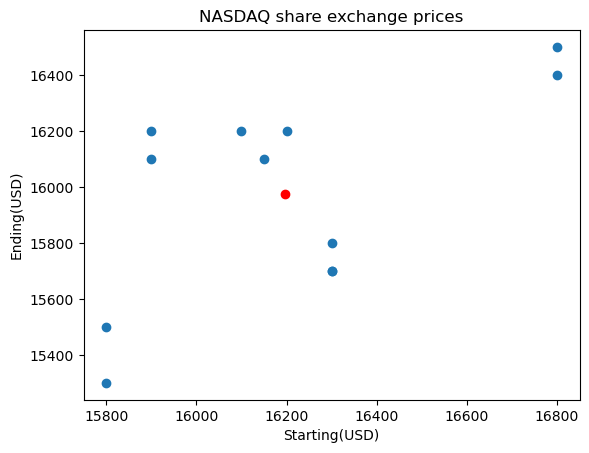

In [24]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ share exchange prices')

In [25]:
reg.fit(x,y) #train the model

LinearRegression()

In [26]:
m=reg.coef_
m

array([[0.65258293]])

In [28]:
c=reg.intercept_
c

array([5405.87555702])

In [29]:
m*16700+c #prediction for 16700

array([[16304.0105628]])

In [31]:
reg.predict([[16700]])

/home/shipu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [32]:
df['Predicted_y']=reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ share exchange prices')

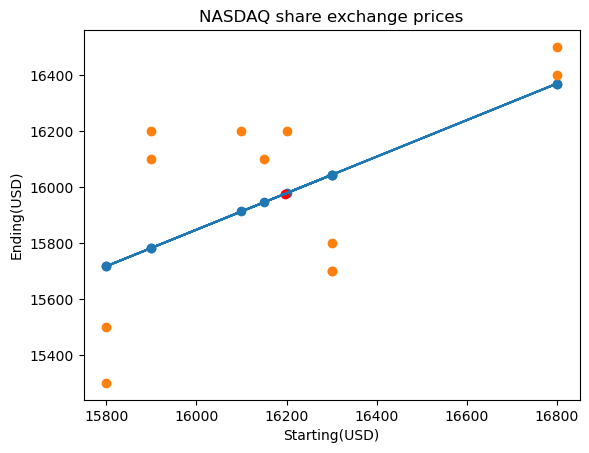

In [38]:
plt.plot(x,reg.predict(x))
plt.scatter(x,reg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ share exchange prices')

# lose and cost estimation

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
df['lose']=mean_squared_error(df['Ending (USD)'],df['Predicted_y'])
df.head()

,Starting (USD),Ending (USD),Predicted_y,lose
0,16800,16500,16369.268856,80411.233977
1,15900,16100,15781.944215,80411.233977
2,15800,15300,15716.685922,80411.233977
3,16100,16200,15912.460802,80411.233977
4,16300,15700,16042.977389,80411.233977


In [42]:
df['lose']=mean_absolute_error(df['Ending (USD)'],df['Predicted_y'])
df.head()

,Starting (USD),Ending (USD),Predicted_y,lose
0,16800,16500,16369.268856,260.384002
1,15900,16100,15781.944215,260.384002
2,15800,15300,15716.685922,260.384002
3,16100,16200,15912.460802,260.384002
4,16300,15700,16042.977389,260.384002


In [43]:
reg.score(x,y)

0.3577804940272571

# performance measurement

In [46]:
from sklearn.metrics import r2_score
r2_score(df['Ending (USD)'],reg.predict(x)) #actual value vs predicted values

0.3577804940272571